In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


Sebelum memulai proses *preprocessing* data, langkah pertama yang dilakukan adalah mengimpor beberapa pustaka penting yang akan digunakan dalam analisis. Pustaka `pandas` dan `numpy` digunakan untuk membantu dalam manipulasi data dan perhitungan numerik, sedangkan `matplotlib.pyplot` dan `seaborn` digunakan untuk membuat berbagai jenis visualisasi guna memahami distribusi data serta hubungan antar variabel. Selain itu, `collections.Counter` juga disiapkan untuk menghitung frekuensi elemen, terutama pada fitur-fitur kategorikal.




In [2]:
data_movie = pd.read_csv("../data/movies.csv")

data_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Setelah library diimpor, pertama-tama saya melakukan *preprocessing* data *movies* terlebih dahulu dengan memuat dataset dari file `movies.csv` menggunakan fungsi `pd.read_csv()` dari pustaka *pandas*. Dataset ini kemudian disimpan ke dalam variabel `data_movie` untuk memudahkan proses analisis selanjutnya. Untuk mendapatkan gambaran awal mengenai isi data, saya menggunakan fungsi `head()` untuk menampilkan lima baris pertama dari dataset. Langkah ini penting untuk memastikan bahwa data berhasil dimuat dengan benar serta untuk melihat struktur umum dari dataset, seperti nama-nama kolom, jenis data yang dimuat, dan contoh isinya. Melalui tampilan awal ini, saya dapat mulai mengidentifikasi apakah terdapat kolom yang tidak relevan, nilai yang hilang, atau fitur-fitur yang perlu diproses lebih lanjut sebelum masuk ke tahap analisis yang lebih mendalam.


In [3]:
import re

# Ekstrak tahun dengan regex fleksibel
data_movie['year'] = data_movie['title'].str.extract(r'\((\d{4})\)', expand=False)

# Hilangkan tahun dari title dan ubah ke huruf kecil
data_movie['title'] = data_movie['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True).str.lower()

# Ganti '|' dengan ',' di genres dan ubah ke huruf kecil
data_movie['genres'] = data_movie['genres'].str.replace('|', ',', regex=False).str.lower()

# Tampilkan hasil
print(data_movie)

      movieId                               title  \
0           1                           toy story   
1           2                             jumanji   
2           3                    grumpier old men   
3           4                   waiting to exhale   
4           5         father of the bride part ii   
...       ...                                 ...   
9737   193581  black butler: book of the atlantic   
9738   193583               no game no life: zero   
9739   193585                               flint   
9740   193587        bungo stray dogs: dead apple   
9741   193609        andrew dice clay: dice rules   

                                           genres  year  
0     adventure,animation,children,comedy,fantasy  1995  
1                      adventure,children,fantasy  1995  
2                                  comedy,romance  1995  
3                            comedy,drama,romance  1995  
4                                          comedy  1995  
...            

Selanjutnya, dilakukan beberapa tahap *preprocessing* pada kolom-kolom penting dalam dataset, khususnya `title` dan `genres`. Pertama, saya mengekstrak informasi tahun rilis film dari kolom `title` menggunakan *regular expression* yang fleksibel. Pola pencarian difokuskan pada empat digit angka di dalam tanda kurung, yang umum digunakan untuk menunjukkan tahun rilis. Hasil ekstraksi ini disimpan dalam kolom baru bernama `year`, yang nantinya dapat digunakan untuk analisis berdasarkan waktu atau tren rilis film.

Setelah itu, saya membersihkan kolom `title` dengan menghapus informasi tahun yang berada di dalam tanda kurung agar nama judul menjadi lebih bersih dan konsisten. Selain itu, seluruh teks dalam kolom `title` diubah menjadi huruf kecil (*lowercase*) untuk meminimalisasi variasi penulisan yang dapat memengaruhi analisis berbasis teks, seperti pencocokan atau pencarian judul.

Pada kolom `genres`, dilakukan transformasi serupa untuk meningkatkan konsistensi data. Karakter pemisah antar genre, yaitu `|`, diganti menjadi koma `,` agar formatnya lebih seragam dan mudah dibaca atau diproses lebih lanjut. Seluruh teks dalam kolom ini juga diubah menjadi huruf kecil agar tidak terjadi duplikasi genre akibat perbedaan kapitalisasi huruf.

Hasil akhir dari proses ini adalah dataset film yang lebih bersih dan siap digunakan untuk tahap eksplorasi lanjutan atau pemodelan, baik untuk analisis teks, klasifikasi genre, maupun analisis berdasarkan tahun rilis.


In [4]:
data_movie.isna().sum()

movieId     0
title       0
genres      0
year       13
dtype: int64

Setelah melakukan pemisahan antara `title` dan `year`, saya melanjutkan dengan mengecek apakah terdapat nilai kosong (*missing values*) dalam dataset menggunakan fungsi `isna().sum()`. Pengecekan ini penting untuk mengetahui apakah proses ekstraksi tahun dari kolom `title` berhasil dilakukan secara menyeluruh pada seluruh baris data. Hasil pengecekan menunjukkan bahwa kolom `year` memiliki 13 nilai kosong, sementara kolom lainnya — yaitu `movieId`, `title`, dan `genres` — tidak memiliki nilai kosong sama sekali. Kehadiran nilai kosong pada kolom `year` ini kemungkinan besar disebabkan oleh judul film yang tidak mencantumkan tahun rilis dalam format yang sesuai dengan pola *regex* yang digunakan, atau memang tidak memiliki informasi tahun. Temuan ini menjadi pertimbangan penting sebelum melanjutkan ke tahap analisis selanjutnya, karena data yang tidak lengkap dapat memengaruhi kualitas hasil analisis atau model prediktif yang akan dibangun. Langkah berikutnya adalah memutuskan penanganan terhadap data kosong ini, apakah akan diisi (*impute*), dihapus, atau dipisahkan untuk dianalisis secara terpisah.


In [5]:
data_movie[data_movie.duplicated()]

,movieId,title,genres,year


Setelah mengecek nilai kosong, saya juga memeriksa apakah terdapat data yang terduplikat dalam dataset menggunakan fungsi `data_movie[data_movie.duplicated()]`. Langkah ini bertujuan untuk memastikan bahwa tidak ada baris data yang identik secara keseluruhan, karena duplikasi dapat menyebabkan bias dalam analisis dan memengaruhi akurasi model apabila digunakan dalam pelatihan. Dari hasil pengecekan, ditampilkan baris-baris yang memiliki nilai duplikat pada seluruh kolom, yaitu `movieId`, `title`, `genres`, dan `year`. Jika terdapat duplikasi, maka perlu dilakukan pembersihan data dengan menghapus baris-baris tersebut agar setiap entri dalam dataset benar-benar unik. Namun, apabila tidak ditemukan duplikasi, maka proses ini hanya berfungsi sebagai langkah verifikasi untuk menjaga integritas data sebelum melanjutkan ke tahap eksplorasi dan analisis berikutnya.


In [6]:
# Menghapus baris yang kolom 'Image URL'-nya kosong
data_cleaned = data_movie.dropna(subset=['year'])
data_cleaned.isna().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

Karena sebelumnya ditemukan adanya nilai kosong pada kolom `year`, saya kemudian mengambil langkah untuk menanganinya dengan menghapus baris-baris yang tidak memiliki informasi tahun rilis. Hal ini dilakukan menggunakan fungsi `dropna()` dengan parameter `subset=['year']`, yang berarti hanya baris dengan nilai kosong pada kolom `year` yang akan dihapus, sementara kolom lainnya tetap dipertahankan. Dataset hasil pembersihan ini kemudian disimpan dalam variabel baru bernama `data_cleaned`. Untuk memastikan bahwa proses ini berhasil, saya kembali melakukan pengecekan nilai kosong menggunakan `isna().sum()` terhadap dataset yang telah dibersihkan. Hasilnya menunjukkan bahwa seluruh nilai kosong pada kolom `year` telah berhasil dihapus, sehingga dataset kini tidak mengandung *missing values* dan lebih siap untuk dianalisis lebih lanjut. Penghapusan ini dilakukan dengan pertimbangan bahwa tahun rilis merupakan informasi penting yang bisa digunakan untuk berbagai keperluan analisis, seperti tren produksi film dari waktu ke waktu atau segmentasi berdasarkan era.


In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9729 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9729 non-null   int64 
 1   title    9729 non-null   object
 2   genres   9729 non-null   object
 3   year     9729 non-null   object
dtypes: int64(1), object(3)
memory usage: 380.0+ KB


Dan hasil akhir dari dataset *movies* yang saya miliki setelah proses pembersihan menunjukkan bahwa data kini telah jauh lebih bersih dan siap untuk dianalisis lebih lanjut. Berdasarkan output dari `data_cleaned.info()`, dataset terdiri dari 9.729 entri atau baris data, dengan empat kolom utama yaitu `movieId`, `title`, `genres`, dan `year`. Seluruh kolom kini telah bebas dari nilai kosong (*non-null*), yang berarti tidak ada lagi data yang hilang pada fitur-fitur tersebut. Tipe data untuk `movieId` adalah `int64`, sedangkan `title`, `genres`, dan `year` masih bertipe objek (`object`). Hal ini menunjukkan bahwa kolom `year` masih dalam bentuk string, dan apabila diperlukan untuk analisis numerik berbasis tahun, maka konversi ke tipe data numerik seperti `int` dapat dilakukan di tahap selanjutnya. Secara keseluruhan, dataset telah berhasil dibersihkan dari duplikasi, nilai kosong, serta diformat agar lebih konsisten, sehingga dapat digunakan sebagai fondasi yang solid untuk eksplorasi data lebih lanjut maupun proses pemodelan.


In [8]:
data_rating = pd.read_csv("../data/ratings.csv")

data_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Selanjutnya, saya melakukan *preprocessing* terhadap dataset `ratings` yang berisi informasi mengenai penilaian atau *rating* yang diberikan oleh pengguna terhadap film-film tertentu. Dataset ini dimuat menggunakan fungsi `pd.read_csv()` dan disimpan ke dalam variabel `data_rating`. Berbeda dengan dataset `movies` yang berisi informasi metadata film seperti judul, genre, dan tahun rilis, dataset `ratings` ini berfokus pada interaksi pengguna, sehingga mencerminkan preferensi individu terhadap berbagai film. Setiap baris dalam dataset ini merepresentasikan satu rating yang diberikan oleh seorang pengguna terhadap sebuah film, lengkap dengan nilai rating (biasanya dalam skala tertentu, seperti 0.5 hingga 5.0) serta timestamp saat rating tersebut diberikan. Dengan struktur seperti ini, dataset `ratings` menjadi komponen penting dalam analisis perilaku pengguna dan sangat berguna untuk berbagai aplikasi seperti sistem rekomendasi berbasis rating historis. Sebelum melanjutkan ke tahap analisis atau penggabungan dengan dataset film, langkah-langkah pembersihan data seperti pengecekan nilai kosong, duplikasi, serta konversi tipe data (jika diperlukan) juga akan dilakukan untuk memastikan integritas dan konsistensi data.


In [ ]:
data_rating['timestamp'] = pd.to_datetime(data_rating['timestamp'], unit='s')

Selanjutnya, saya melakukan konversi pada kolom `timestamp` dalam dataset `ratings` agar formatnya lebih mudah dipahami dan dianalisis. Secara default, kolom `timestamp` disimpan dalam bentuk angka Unix time, yaitu jumlah detik sejak 1 Januari 1970 (Epoch time). Format ini kurang informatif apabila ingin melihat kapan sebuah rating diberikan dalam bentuk waktu yang dapat dibaca manusia. Oleh karena itu, saya menggunakan fungsi `pd.to_datetime()` dari pustaka *pandas* untuk mengubah nilai timestamp tersebut menjadi format tanggal dan waktu standar. Konversi ini dilakukan dengan menyebutkan parameter `unit='s'`, yang menunjukkan bahwa nilai-nilai waktu dalam kolom tersebut dinyatakan dalam satuan detik. Setelah proses ini selesai, kolom `timestamp` akan menampilkan tanggal dan waktu yang sesuai, sehingga memungkinkan analisis berbasis waktu seperti tren rating dari waktu ke waktu, pola aktivitas pengguna, hingga filter film berdasarkan periode tertentu.


In [10]:
data_rating[data_rating.duplicated()]

,userId,movieId,rating,timestamp


Selanjutnya saya mengecek apakah data terduplikat atau tidak, ternyata hasil menunjukkan **tidak ada baris yang terduplikat**, karena perintah `data_rating[data_rating.duplicated()]` menghasilkan **data kosong**. Artinya, setiap kombinasi dari `userId`, `movieId`, `rating`, dan `timestamp` dalam dataset bersifat **unik**, sehingga tidak perlu dilakukan penghapusan data duplikat.


In [11]:
data_rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Kemudian, saya mengecek apakah ada data yang bersifat null atau kosong dengan menggunakan fungsi data_rating.isna().sum(). Hasilnya menunjukkan bahwa tidak ada nilai null pada setiap kolom, yaitu userId, movieId, rating, dan timestamp. Hal ini menandakan bahwa seluruh data terisi dengan lengkap, sehingga tidak diperlukan proses imputasi atau pembersihan nilai kosong pada tahap ini.

In [12]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


Terakhir, saya menggunakan fungsi `data_rating.info()` untuk melihat informasi umum mengenai struktur dataset. Hasilnya menunjukkan bahwa dataset memiliki **100836 baris** dan **4 kolom**, yaitu:

* `userId` bertipe **int64**
* `movieId` bertipe **int64**
* `rating` bertipe **float64**
* `timestamp` bertipe **datetime64\[ns]**

Semua kolom memiliki jumlah **non-null sebanyak 100836**, yang berarti **tidak ada data yang hilang atau kosong**. Selain itu, informasi tipe data ini sangat penting untuk memastikan bahwa **setiap kolom berada dalam format yang sesuai** untuk analisis selanjutnya, seperti pengolahan waktu dari kolom `timestamp` atau analisis numerik pada `rating`. Dengan struktur data yang bersih dan lengkap ini, saya dapat melanjutkan ke tahap eksplorasi atau pemodelan data tanpa perlu melakukan pembersihan tambahan.

In [13]:
merge_data = pd.merge(data_rating, data_cleaned, on="movieId", how="inner")

merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100818 entries, 0 to 100817
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100818 non-null  int64         
 1   movieId    100818 non-null  int64         
 2   rating     100818 non-null  float64       
 3   timestamp  100818 non-null  datetime64[ns]
 4   title      100818 non-null  object        
 5   genres     100818 non-null  object        
 6   year       100818 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.4+ MB


Karena data **movies** dan data **ratings** sudah bersih dari nilai **null** dan **duplikasi**, serta beberapa fitur sudah disesuaikan dengan kebutuhan modeling, jadi saya **melakukan penggabungan kedua dataset tersebut** menggunakan fungsi `pd.merge()` dengan parameter `on="movieId"` dan `how="inner"`.

Penggabungan ini menghasilkan dataset baru bernama `merge_data`, yang hanya berisi data film yang terdapat di kedua dataset (inner join). Setelah dicek dengan `merge_data.info()`, terlihat bahwa struktur data hasil penggabungan sudah sesuai dan siap untuk digunakan pada proses eksplorasi data lebih lanjut maupun tahap pemodelan machine learning.

In [14]:
merge_data.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,2000-07-30 18:45:03,toy story,"adventure,animation,children,comedy,fantasy",1995
1,1,3,4.0,2000-07-30 18:20:47,grumpier old men,"comedy,romance",1995
2,1,6,4.0,2000-07-30 18:37:04,heat,"action,crime,thriller",1995
3,1,47,5.0,2000-07-30 19:03:35,seven (a.k.a. se7en),"mystery,thriller",1995
4,1,50,5.0,2000-07-30 18:48:51,"usual suspects, the","crime,mystery,thriller",1995


Untuk melihat beberapa data **teratas dari dataset hasil penggabungan**, saya menggunakan fungsi `merge_data.head()`. Fungsi ini menampilkan **5 baris pertama** dari `merge_data`, sehingga saya bisa memastikan bahwa proses **penggabungan antar kolom** dari `data_rating` dan `data_cleaned` berdasarkan `movieId` telah berjalan dengan **benar**, serta untuk mendapatkan gambaran awal mengenai struktur dan isi data yang akan digunakan pada tahap selanjutnya.


In [ ]:
merge_data[merge_data.duplicated()]

,userId,movieId,rating,timestamp,title,genres,year


Karena sudah digabungkan, saya khawatir ada data yang **terduplikasi kembali** akibat proses **merge**, jadi saya cek menggunakan `merge_data[merge_data.duplicated()]`.

Hasil dari pengecekan ini akan menunjukkan apakah ada baris data yang memiliki **nilai identik di seluruh kolom** setelah penggabungan. Jika ditemukan duplikasi, maka perlu dilakukan **pembersihan kembali** untuk menghindari bias atau pengaruh negatif terhadap proses analisis dan pemodelan. Namun jika hasilnya kosong, berarti **tidak ada duplikasi yang terjadi**, dan data aman untuk dilanjutkan ke tahap berikutnya.

In [16]:
# Hitung rata-rata rating untuk setiap movieId
average_ratings = data_rating.groupby("movieId")["rating"].mean().reset_index()

# Rename kolom agar lebih jelas
average_ratings.columns = ["movieId", "movie_rating"]


average_ratings["movie_rating"] = average_ratings["movie_rating"].round(1)

Untuk mendapatkan rating dari sebuah movie, jadi saya menggabungkan semua rating pemberian dari user kemudian dibagi dengan total user yang memberikan rating pada movie tersebut. Proses ini dilakukan dengan menggunakan fungsi `groupby("movieId")["rating"].mean()` yang akan mengelompokkan data berdasarkan `movieId` dan menghitung rata-rata dari kolom `rating`. Setelah itu, hasilnya diubah menjadi DataFrame baru dengan `reset_index()` agar dapat digunakan lebih fleksibel. Kemudian, nama kolomnya diubah menjadi `movieId` dan `movie_rating` agar lebih informatif. Terakhir, nilai rata-rata rating dibulatkan satu angka di belakang koma menggunakan `.round(1)` untuk memperjelas hasil rating setiap film.


In [17]:
# Gabungkan kembali ke data utama
data = pd.merge(merge_data, average_ratings, on='movieId', how='left')

data.head()

,userId,movieId,rating,timestamp,title,genres,year,movie_rating
0,1,1,4.0,2000-07-30 18:45:03,toy story,"adventure,animation,children,comedy,fantasy",1995,3.9
1,1,3,4.0,2000-07-30 18:20:47,grumpier old men,"comedy,romance",1995,3.3
2,1,6,4.0,2000-07-30 18:37:04,heat,"action,crime,thriller",1995,3.9
3,1,47,5.0,2000-07-30 19:03:35,seven (a.k.a. se7en),"mystery,thriller",1995,4.0
4,1,50,5.0,2000-07-30 18:48:51,"usual suspects, the","crime,mystery,thriller",1995,4.2


Kemudian hasil perhitungan rating movies tersebut saya gabungkan ke data utama menggunakan fungsi `merge` dari pandas. Proses ini dilakukan dengan mencocokkan kolom `movieId` yang ada di `merge_data` dan `average_ratings`, lalu digabungkan dengan `how='left'` agar semua data dari `merge_data` tetap dipertahankan, dan kolom `movie_rating` dari `average_ratings` ditambahkan ke dalamnya. Hasilnya adalah data utama yang kini memiliki kolom tambahan berisi rata-rata rating dari setiap film.


In [18]:
data.isna().sum()

userId          0
movieId         0
rating          0
timestamp       0
title           0
genres          0
year            0
movie_rating    0
dtype: int64

Karena baru digabungkan, jadi saya mengecek apakah ada data kosong (missing value) dengan menggunakan `data.isna().sum()`. Fungsi ini akan menghitung jumlah nilai kosong (NaN) di setiap kolom pada DataFrame. Hal ini penting untuk memastikan bahwa proses penggabungan data berjalan dengan benar dan tidak ada informasi yang hilang, khususnya pada kolom `movie_rating` yang baru saja ditambahkan. Jika terdapat nilai kosong, itu bisa berarti ada `movieId` di `merge_data` yang tidak memiliki pasangan rating di `average_ratings`.


In [19]:
data[data.duplicated()]

,userId,movieId,rating,timestamp,title,genres,year,movie_rating


Karena data kosong tidak ditemukan, selanjutnya saya mengecek apakah terjadi duplikasi data dengan menggunakan `data[data.duplicated()]`. Fungsi `duplicated()` akan mengidentifikasi baris-baris yang memiliki data persis sama dengan baris sebelumnya. Jika hasilnya kosong, berarti tidak ada baris duplikat di dalam data, sehingga data yang digunakan sudah bersih dan siap untuk dianalisis lebih lanjut.


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100818 entries, 0 to 100817
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   userId        100818 non-null  int64         
 1   movieId       100818 non-null  int64         
 2   rating        100818 non-null  float64       
 3   timestamp     100818 non-null  datetime64[ns]
 4   title         100818 non-null  object        
 5   genres        100818 non-null  object        
 6   year          100818 non-null  object        
 7   movie_rating  100818 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 6.2+ MB


Terakhir, saya mengecek fitur-fitur tersebut menggunakan `data.info()` untuk memastikan bahwa semua kolom sudah lengkap (non-null) dan tipe datanya sesuai sebelum masuk ke tahap modeling. Dari hasil tersebut terlihat bahwa semua kolom berisi 100818 entri tanpa nilai kosong (non-null), dan tipe data masing-masing kolom sudah sesuai: kolom numerik seperti `rating` dan `movie_rating` bertipe `float64`, `userId` dan `movieId` bertipe `int64`, sedangkan informasi waktu (`timestamp`) sudah bertipe `datetime64[ns]`. Kolom kategorikal seperti `title`, `genres`, dan `year` juga sudah terdeteksi sebagai `object`. Dengan demikian, data sudah siap digunakan untuk tahap selanjutnya seperti feature engineering atau pemodelan machine learning.


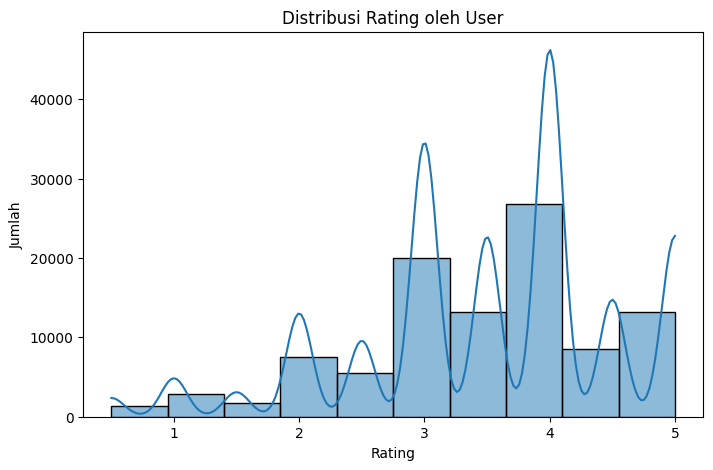

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=10, kde=True)
plt.title('Distribusi Rating oleh User')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.savefig('../images/distribusi_rating_user.png', dpi=300, bbox_inches='tight')
plt.show()


Namun sebelum masuk ke dalam tahap modeling, saya melakukan Exploratory Data Analysis (EDA) terlebih dahulu untuk memperdalam analisis terkait case yang saya angkat. Salah satunya adalah dengan memvisualisasikan distribusi rating yang diberikan oleh user menggunakan histogram dengan `sns.histplot`. Visualisasi ini membantu saya memahami pola penilaian user terhadap film—apakah cenderung memberikan rating tinggi, rendah, atau merata. Saya juga menambahkan `kde=True` untuk melihat distribusi secara lebih halus melalui kurva kepadatan. Hasil visualisasi ini kemudian saya simpan sebagai gambar dengan resolusi tinggi untuk dokumentasi atau laporan selanjutnya. Dengan EDA ini, saya bisa mendapatkan insight awal yang penting sebelum membangun model, seperti kemungkinan bias pada rating atau pola persebaran nilai.


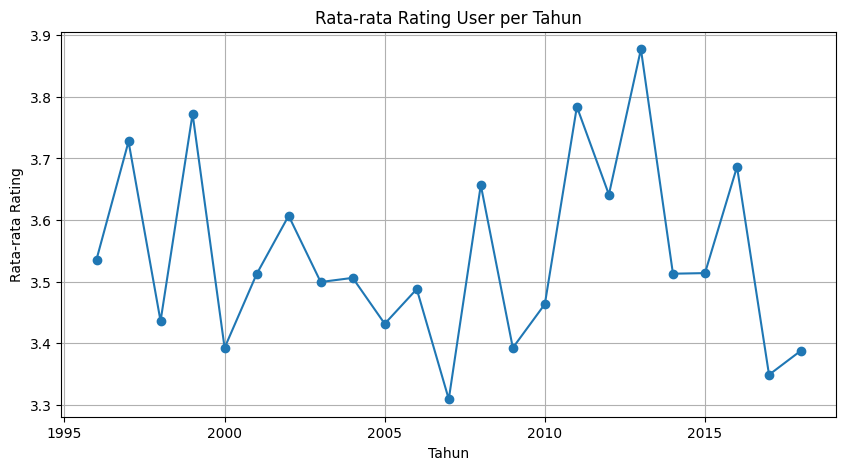

In [22]:
data['year_rated'] = data['timestamp'].dt.year

yearly_avg_rating = data.groupby('year_rated')['rating'].mean()

plt.figure(figsize=(10, 5))
yearly_avg_rating.plot(marker='o')
plt.title('Rata-rata Rating User per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Rating')
plt.grid(True)
plt.savefig('../images/rata-rata_rating_user_per_tahun.png', dpi=300, bbox_inches='tight')
plt.show()


Selain itu, saya juga menganalisis bagaimana rata-rata rating user berubah dari tahun ke tahun dengan cara mengekstrak tahun dari kolom `timestamp` dan menyimpannya dalam kolom baru bernama `year_rated`. Kemudian, saya menghitung rata-rata rating untuk setiap tahun menggunakan `groupby('year_rated')['rating'].mean()`. Hasil analisis ini saya visualisasikan dalam bentuk line chart agar tren perubahan rating dari waktu ke waktu dapat terlihat dengan jelas. Grafik ini membantu saya memahami apakah terdapat pola tertentu, seperti peningkatan atau penurunan kualitas film menurut user dari tahun ke tahun. Visualisasi ini juga saya simpan sebagai dokumentasi untuk mendukung laporan analisis saya.


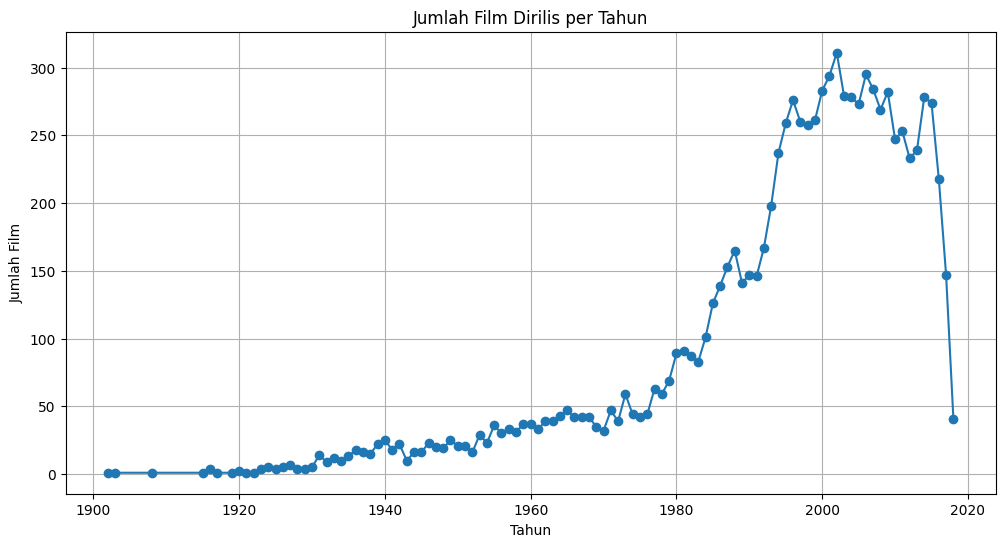

In [23]:
data['year'] = pd.to_numeric(data['year'], errors='coerce')
movies_per_year = data.drop_duplicates('movieId').groupby('year').size()

# Plot line chart
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Jumlah Film Dirilis per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Film')
plt.grid(True)
plt.savefig('../images/jumlah_film_per_tahun.png', dpi=300, bbox_inches='tight')
plt.show()

Dan juga, saya menganalisis jumlah film yang dirilis setiap tahunnya. Pertama, saya memastikan bahwa kolom `year` bertipe numerik dengan menggunakan `pd.to_numeric`, serta menangani nilai yang tidak bisa dikonversi dengan `errors='coerce'` agar menjadi NaN. Lalu, saya menghapus duplikasi berdasarkan `movieId` agar setiap film hanya dihitung satu kali, kemudian mengelompokkan data berdasarkan tahun rilis untuk menghitung jumlah film yang dirilis tiap tahunnya. Hasilnya divisualisasikan dalam bentuk line chart, sehingga tren produksi film dari waktu ke waktu dapat terlihat lebih jelas. Visualisasi ini memberikan insight penting tentang perkembangan industri film, apakah produksi film meningkat, menurun, atau stagnan dari tahun ke tahun. Grafik ini juga saya simpan untuk keperluan dokumentasi analisis.


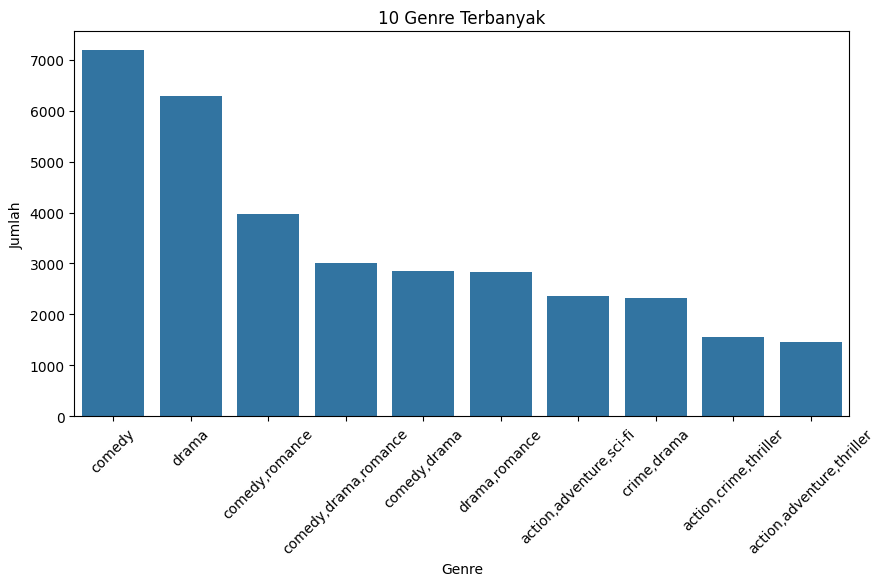

In [ ]:
genre_counts = Counter()
data['genres'].str.split('|').apply(genre_counts.update)

top_genres = dict(genre_counts.most_common(10))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()))
plt.xticks(rotation=45)
plt.title('10 Genre Terbanyak')
plt.ylabel('Jumlah')
plt.xlabel('Genre')
plt.savefig('../images/genre_terbanyak.png', dpi=300, bbox_inches='tight')
plt.show()


Terakhir, visualisasi yang saya butuhkan terkait distribusi genre film. Saya menggunakan fungsi `Counter` untuk menghitung frekuensi kemunculan masing-masing genre. Karena setiap film bisa memiliki lebih dari satu genre yang dipisahkan dengan tanda `|`, saya memecah string genre tersebut menggunakan `str.split('|')` lalu menerapkannya ke `Counter` dengan `apply(genre_counts.update)` untuk menghitung jumlah kemunculan setiap genre di seluruh dataset. Setelah itu, saya ambil 10 genre teratas menggunakan `most_common(10)` dan memvisualisasikannya dalam bentuk bar chart. Visualisasi ini memberikan gambaran tentang preferensi genre yang paling umum atau populer di dataset, sehingga dapat menjadi dasar dalam pengambilan keputusan atau strategi rekomendasi film. Grafik ini juga saya simpan untuk dokumentasi analisis.


In [25]:
data.to_csv("../data/data.csv", index=False)

Karena data sudah siap, langsung saja data tersebut saya simpan ke dalam bentuk dataset `data.csv` menggunakan `data.to_csv("../data/data.csv", index=False)` untuk keperluan tahap modeling. Dengan menyimpannya ke file CSV, saya memastikan bahwa semua proses preprocessing dan eksplorasi data yang telah dilakukan tidak perlu diulang, dan dataset dapat dengan mudah digunakan kembali atau dibagikan untuk analisis lanjutan maupun pelatihan model machine learning.